# Model Evaluation

This workshop will follow through the process of predictive analytics model development.  
  
First, a predictive model development for Boston housing data.

**Regression**
1.   Dataset split
2.   Model evaluation statistics for regression
3.   Evaluate bias and varience
4.   Fine tune the model to improve the accuracy

Second, a classification model for breast cancer detection.

**Classification**
1.   Dataset split
2.   Model evaluation statistics for classification

Thirdly, cross validation analysis for cancer dataset.


In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split

# This is to remove warnings provided by the python libraries
import warnings
warnings.filterwarnings("ignore")

## Regression

Upload Boston House dataset and load it.


In [ ]:
df = pd.read_csv('tp3_boston_data.csv')  # Load the dataset

In [ ]:
df.info()

###Selecting your dataset split

In [ ]:
df_x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
df_y = df[['medv']]

In [ ]:
df_x.shape

(506, 12)

This dataset contains 506 data points. Therefore, we could select data split as train/validation as 70/30 (we will not be using test data split)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

### Modeling

Train a simple linear regression model

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_val)

### Model Evaluation Statistics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Error calculation 
error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))
error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))
error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))

Training Root Mean Squared Error: 4.477298307360929
Validation Root Mean Squared Error: 5.461959116713417
Training Mean Absolute Error: 3.2174054306410693
Validation Mean Absolute Error: 3.54932131747494
Training R2 Error: 0.6647291592059915
Validation R2 Error: 0.5481922103844163


### Analysis: Bias and Variance

Based on the evaluation metrices, it can be seen that there is a high bias in the predicted values.  
**What options we have to improve the accuracy?**  
1.  Making the model complex  
2.  ...

### Modeling a complex NN model

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(150), max_iter=1500)

In [ ]:
mlp.fit(X_train, Y_train)

In [ ]:
# Training accuracy
Y_train_predict = mlp.predict(X_train)
# Validation accuracy
Y_val_predict = mlp.predict(X_val)

In [ ]:
# Error calculation 
error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))
error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))
error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))

Training Root Mean Squared Error: 4.363003583252
Validation Root Mean Squared Error: 4.727512242854376
Training Mean Absolute Error: 3.304188255674149
Validation Mean Absolute Error: 3.6058490111333508
Training R2 Error: 0.663494392103787
Validation R2 Error: 0.6389173366428582


## Classification

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the dataset directly from sklearn sample dataset library
cancer = load_breast_cancer()

In [ ]:
print(cancer.get('DESCR'))

In [ ]:
df_x = pd.DataFrame(cancer.get('data'),columns=cancer.get('feature_names'))
df_y = pd.DataFrame(cancer.get('target'))

In [ ]:
df_x.shape

(569, 30)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

### Modeling 

We will model a simple logistic regression as the initial step.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)

In [ ]:
# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_val)

### Evaluation Metrics

#### Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_val_predict, Y_val)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.9371859296482412
Validation Classif Accuracy: 0.9532163742690059


#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[136,  10],
       [ 15, 237]])

#### F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
error_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_val_predict, Y_val)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.9498997995991983
Validation F1 Score: 0.963963963963964


#### Classification Report 

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_val)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       146
           1       0.96      0.94      0.95       252

    accuracy                           0.94       398
   macro avg       0.93      0.94      0.93       398
weighted avg       0.94      0.94      0.94       398

Validation report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.97      0.96      0.96       112

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### AUC and ROC Curve

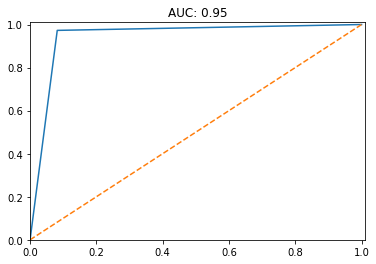

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_val, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_val, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

## k-Fold cross validation

Apply k-fold cross validation for cancer detection dataset.

In [ ]:
# Load the dataset directly
cancer = load_breast_cancer()

In [ ]:
df_x = pd.DataFrame(cancer.get('data'),columns=cancer.get('feature_names'))
df_y = pd.DataFrame(cancer.get('target'))
X = df_x.values
Y = df_y.values

In [ ]:
from sklearn import model_selection

In [ ]:
k = 10 # use 10-Fold cross validation with logistic regression
kfold = model_selection.KFold(n_splits=k, random_state=2)
model = LogisticRegression()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# Classification accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: {:.2f} ({:.2f})".format(results.mean(), results.std()))

Accuracy: 0.94 (0.04)


In [ ]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: {:.2f} ({:.2f})".format(results.mean(), results.std()))

AUC: 0.99 (0.01)


## Exercise: Credit card fraud detection

Detect credit card frauds using [this](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset.